# **eCommerce Transactions Dataset Analysis**
This notebook contains an exploratory data analysis (EDA) and business insights derived from the given eCommerce dataset. The dataset includes information on customers, products, and transactions. Insights will be presented to aid business decision-making.


> Add blockquote



### **1. Load Libraries and Dataset**
Import required libraries and load the datasets for analysis.


In [32]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display dataset overview
print("Customers Dataset:")
print("\nTop data from the dataset\n")
print(customers.head())
print("\nInfo about the Data\n")
print(customers.info())

print("\nProducts Dataset:")
print("\nTop data from the dataset\n")
print(products.head())
print("\nInfo about the Data\n")
print(products.info())

print("\nTransactions Dataset:")
print("\nTop data from the dataset\n")
print(transactions.head())
print("\nInfo about the Data\n")
print(transactions.info())


Customers Dataset:

Top data from the dataset

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Info about the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset:

Top data from the dataset

  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      

### **2. Check for Missing Values and Duplicates**
Identify missing values and duplicate entries in the dataset.


In [33]:
# Check for missing values
print("Missing Values:")
print("\nCustomers:\n", customers.isnull().sum())
print("\nProducts:\n", products.isnull().sum())
print("\nTransactions:\n", transactions.isnull().sum())

# Check for duplicate entries
print("\nDuplicate Entries:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Missing Values:

Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Duplicate Entries:
Customers: 0
Products: 0
Transactions: 0


### **3. Customers Dataset Analysis**
Analyze customer distribution and signup trends.


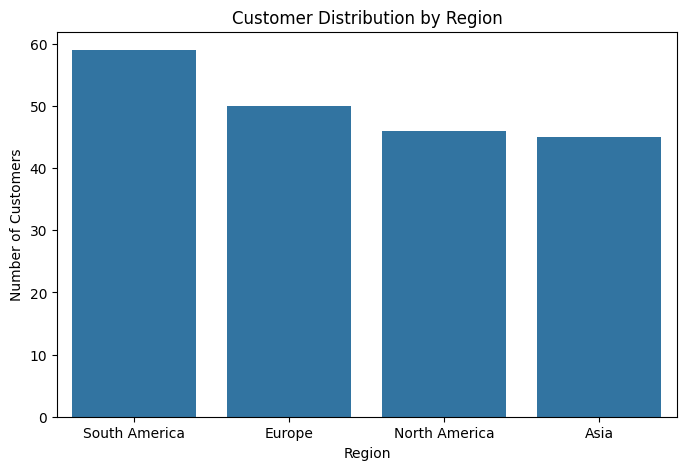

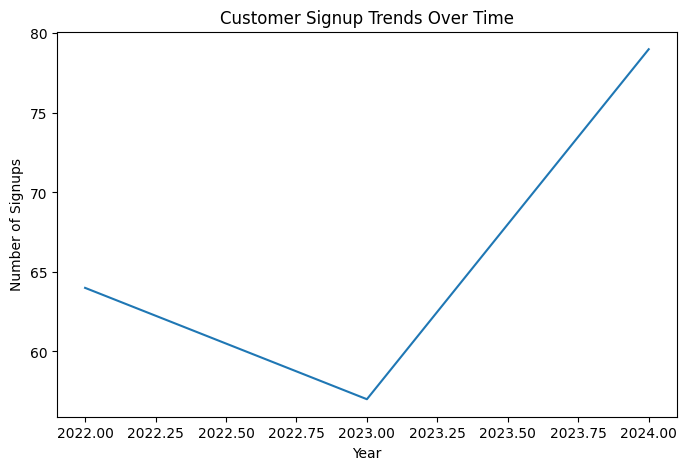

In [34]:
# Customer distribution by region
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

# Signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x=signup_trends.index, y=signup_trends.values)
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()


### **4. Products Dataset Analysis**
Explore product pricing and category distribution.


Top 10 Most Expensive Products:

   ProductID               ProductName     Category   Price
74      P075          TechPro Textbook        Books  497.76
31      P032        BookWorld Cookbook        Books  488.63
44      P045         SoundWave T-Shirt     Clothing  481.78
16      P017       ActiveWear Textbook        Books  469.77
36      P037      SoundWave Smartwatch  Electronics  459.86
40      P041  ComfortLiving Smartphone  Electronics  456.28
82      P083     ActiveWear Smartwatch  Electronics  455.72
22      P023   ActiveWear Cookware Set   Home Decor  454.53
63      P064   HomeSense Running Shoes     Clothing  452.42
93      P094    HomeSense Cookware Set   Home Decor  447.34


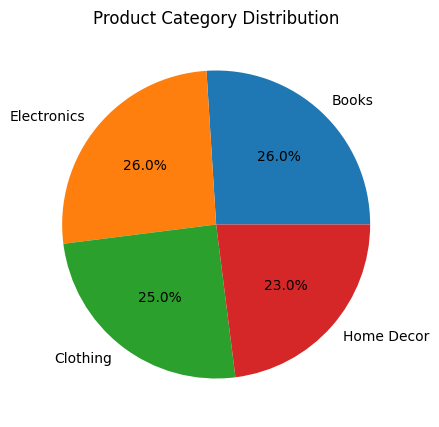

In [35]:
# Top 10 most expensive products
top_expensive = products.sort_values('Price', ascending=False).head(10)
print("Top 10 Most Expensive Products:\n")
print(top_expensive)

# Product category distribution
category_counts = products['Category'].value_counts()
plt.figure(figsize=(8, 5))
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()


### **5. Transactions Dataset Analysis**
Analyze transaction patterns and revenue contributors.


Top 10 Products by Total Sales Value:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64


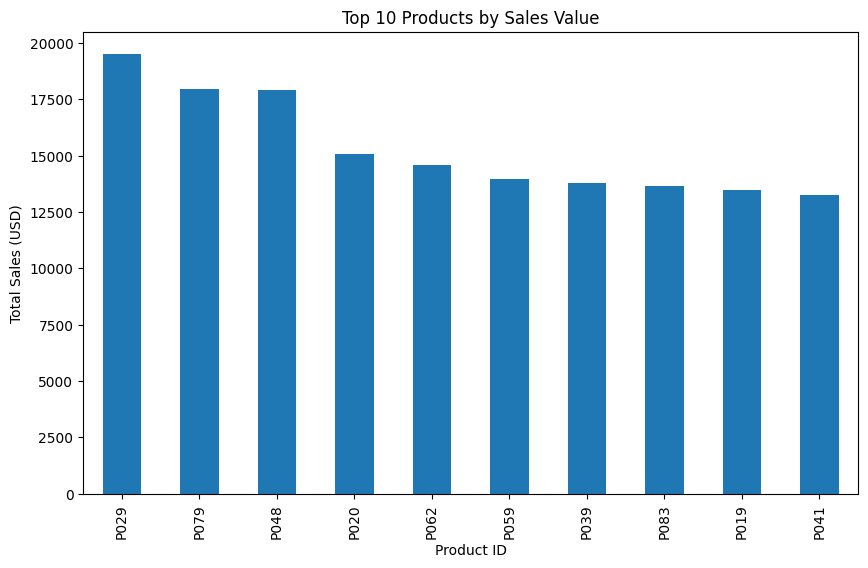

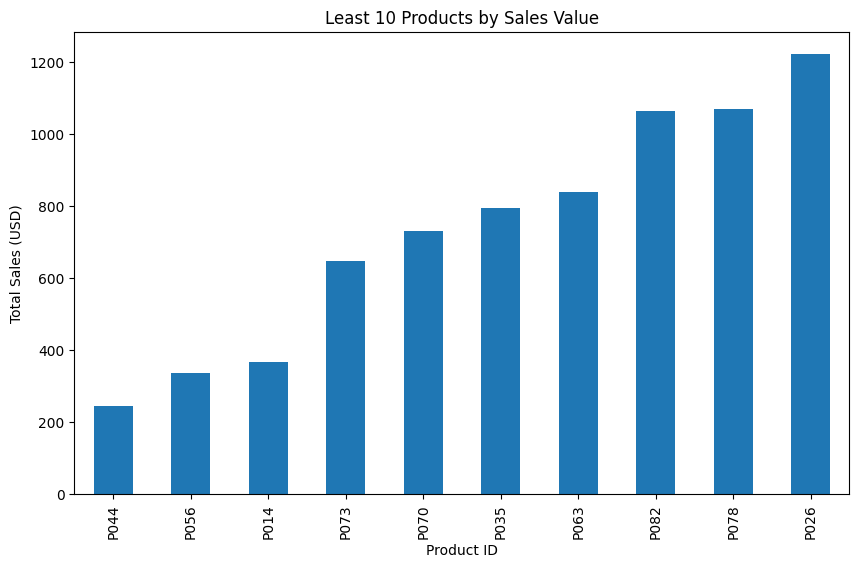

Top 10 Customers by Total Purchase Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


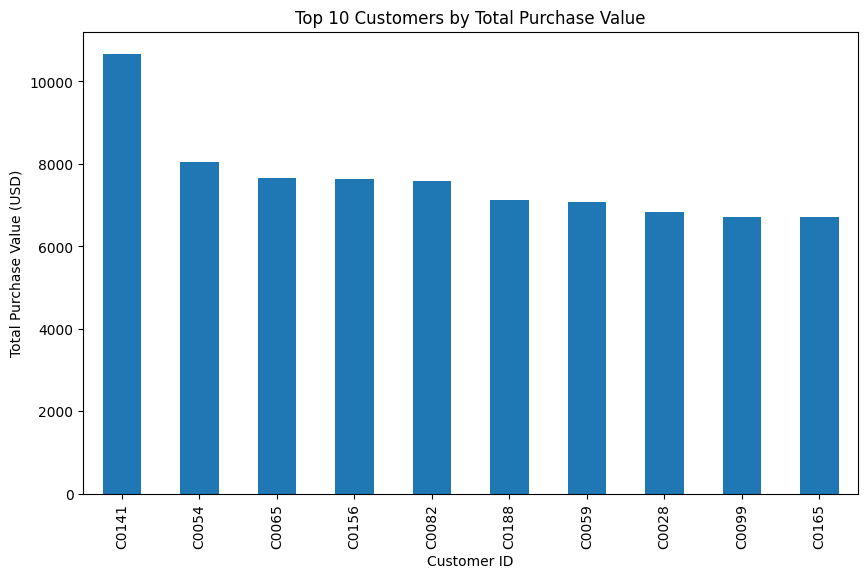

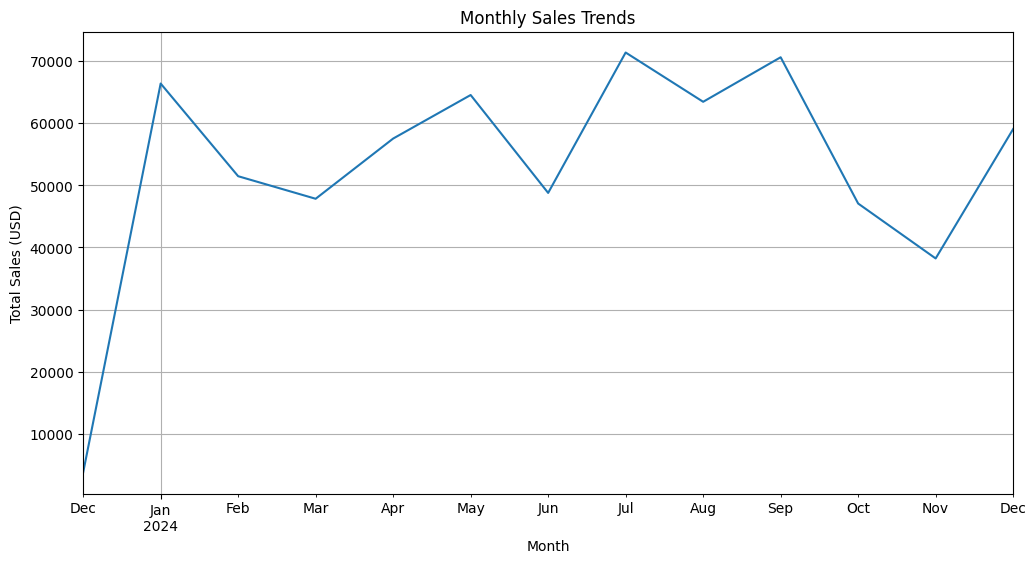

In [40]:
# Sales trends over time
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Top 10 products by total sales value
top_sales_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Total Sales Value:")
print(top_sales_products)

least_sales = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=True).head(10)

# Visualization
plt.figure(figsize=(10, 6))
top_sales_products.plot(kind='bar')
plt.title('Top 10 Products by Sales Value')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (USD)')
plt.show()

# Visualization
plt.figure(figsize=(10, 6))
least_sales.plot(kind='bar')
plt.title('Least 10 Products by Sales Value')
plt.xlabel('Product ID')
plt.ylabel('Total Sales (USD)')
plt.show()

# Top 10 customers by total purchase value
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Purchase Value:")
print(top_customers)

# Visualization
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Total Purchase Value')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Value (USD)')
plt.show()


# Group transactions by month and calculate total sales
sales_trends = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trends.index = sales_trends.index.to_timestamp()

# Visualization
plt.figure(figsize=(12, 6))
sales_trends.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()


### **6. Merged Dataset Analysis**
Combine datasets for deeper analysis.


Total Sales by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


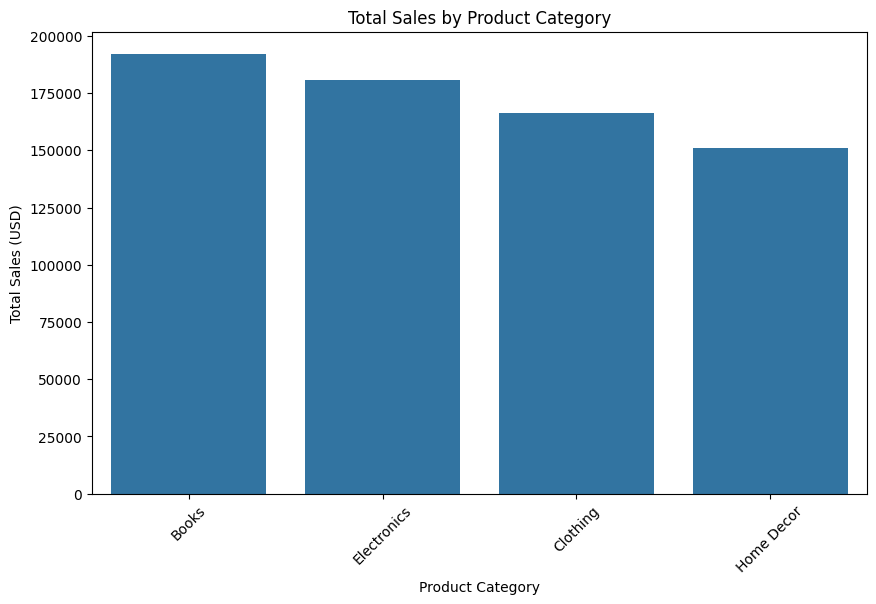

Total Sales and Percentage of Sales by Product Category:
             Total Sales (USD)  Percentage of Total Sales (%)
Category                                                     
Books                192147.47                      27.847639
Electronics          180783.50                      26.200676
Clothing             166170.66                      24.082859
Home Decor           150893.93                      21.868826


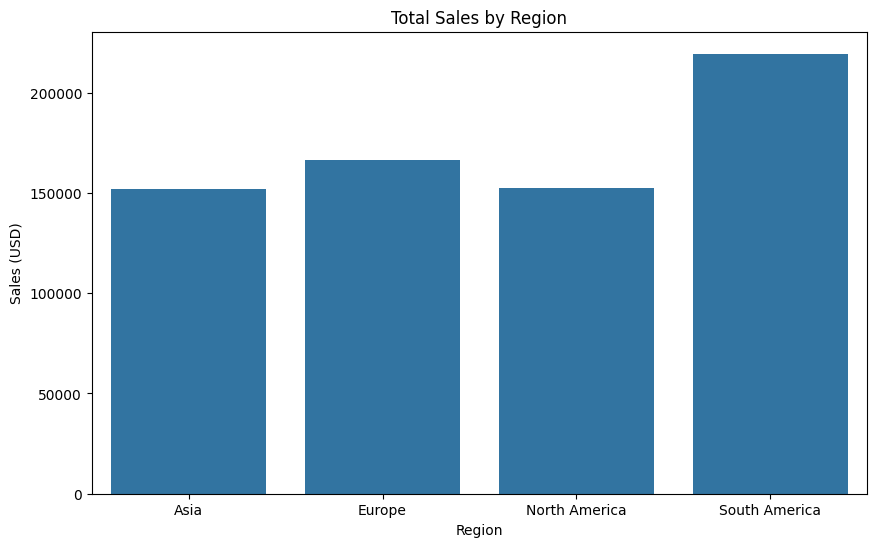

In [37]:
# Merge transactions with products to get category information
merged_transactions = transactions.merge(products, on='ProductID')

# Group by category and calculate total sales
category_sales = merged_transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print("Total Sales by Product Category:")
print(category_sales)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

# Group by category and calculate total sales
category_sales = merged_transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Calculate percentage of total sales by category
total_sales = category_sales.sum()
category_sales_percentage = (category_sales / total_sales) * 100

# Display total sales and percentage of sales by category
category_sales_df = pd.DataFrame({
    'Total Sales (USD)': category_sales,
    'Percentage of Total Sales (%)': category_sales_percentage
})

print("Total Sales and Percentage of Sales by Product Category:")
print(category_sales_df)

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Sales by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales (USD)')
plt.show()


## **7.Seasonality Analysis: Sales by Quarter**


Quarterly Sales Data:
Quarter          1          2          3          4
Year                                               
2023           NaN        NaN        NaN    3769.52
2024     165664.39  170817.98  205406.88  144336.79


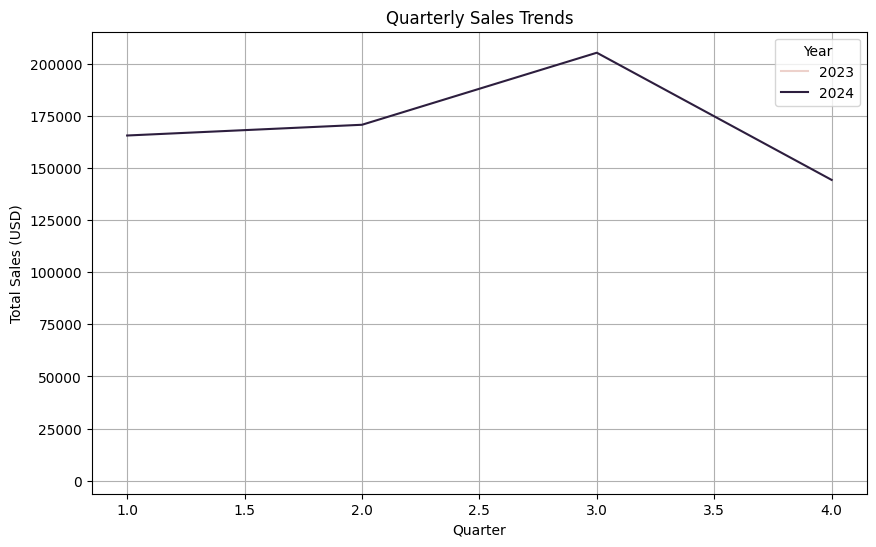

In [38]:
# Extract quarter and year from TransactionDate
merged_transactions['Year'] = merged_transactions['TransactionDate'].dt.year
merged_transactions['Quarter'] = merged_transactions['TransactionDate'].dt.quarter

# Group sales by year and quarter
quarterly_sales = merged_transactions.groupby(['Year', 'Quarter'])['TotalValue'].sum().reset_index()

# Pivot the data to make visualization easier
quarterly_sales_pivot = quarterly_sales.pivot(index='Year', columns='Quarter', values='TotalValue')

print("Quarterly Sales Data:")
print(quarterly_sales_pivot)

# Plot sales by quarter
plt.figure(figsize=(10, 6))
sns.lineplot(x='Quarter', y='TotalValue', hue='Year', data=quarterly_sales)
plt.title('Quarterly Sales Trends')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()


## **8. Business Insights**
Here are 5 actionable insights derived from the analysis:


1. **Customer Distribution**: The majority of customers are from South America, contributing to the highest sales revenue. Expanding operations in South America could be beneficial.


2. **Top Products**: Product P029 is the highest-selling product with total sales of USD 19513.80, contributing significantly to revenue. Ensuring stock availability is critical.


3. **Signup Trends**: The highest customer signup occurred in 2024, indicating recent growth from the major downfall in 2023. Retention strategies for new customers should be prioritized.


4. **Category Performance**: Books is the most profitable category, accounting for 28%(Approx) of total sales. Expanding this category could boost revenue further.


5. **Seasonality**: Sales peak in Q3, indicating potential seasonal demand. Strategic marketing during this period could maximize sales.

